## 3b. Remove lick artifacts in Ripple Band LFP.
Run this notebook only after artifact detection has been run in notebook `Basic Ephys`.
#### This notebook removes 2 kinds of artifact:
1. Lick artifact: these are detected as simultaneous spikes across >50% channels.
2. Head banging/chewing artifact: these do not manifest in spike band, but in the broadband LFP. These are detected by first standardize broadband LFP, and are flagged as moments where there are simultaneous crossing >2SD (<-2SD, using >2SD can let ripples with large Sharp Wave component be detected as artifact. Since we rarely record from below the cell layer, <-2SD is a safer option than absolute >2SD) across 80% of electrodes.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr

import spyglass as nd
import datajoint as dj
import multiprocessing

# ignore datajoint+jupyter async warnings
import warnings
warnings.simplefilter('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore', category=ResourceWarning)
warnings.simplefilter('ignore', category=UserWarning)

import matplotlib.pyplot as plt

In [3]:
# We also import a bunch of tables so that we can call them easily
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
from spyglass.shijiegu.load import load_session_name,load_maze_spike,load_LFP,load_position
from spyglass.shijiegu.Analysis_SGU import EpochPos
from spyglass.shijiegu.ripple_detection import loadRippleLFP_OneChannelPerElectrode

# The workhorse of the experiment
from spyglass.shijiegu.ripple_detection import removeArtifactInFilteredData
from spyglass.common import IntervalList

[2025-04-10 09:21:06,764][INFO]: Connecting shijiegu-alt@lmf-db.cin.ucsf.edu:3306
[2025-04-10 09:21:06,812][INFO]: Connected shijiegu-alt@lmf-db.cin.ucsf.edu:3306


In [4]:
from spyglass.shijiegu.Analysis_SGU import LFPBandArtifact

### The only cell to be edited:

In [32]:
nwb_file_name = 'molly20220420.nwb'#'haydn20230608.nwb'

### Run the rest

In [33]:
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

In [34]:
session_interval, sleep_interval = load_session_name(nwb_copy_file_name)

In [ ]:
for s in session_interval:
    removeArtifactInFilteredData(nwb_copy_file_name, s,
                             filter_name = 'Ripple 150-250 Hz',broadband_zscore = -1)

#for s in sleep_interval:
#    removeArtifactInFilteredData(nwb_copy_file_name, s,
#                             filter_name = 'Ripple 150-250 Hz',broadband_zscore = -1)

[13:15:04][INFO] Spyglass: Writing new NWB file molly20220420_XVZ2I10U4Q.nwb...


Using LFP from these eletrodes: 
[ 0  2  3  6  7  9 10 12 15 17 18 24 25 27 34 37 39 40 41 46 50 52 53 60
 61]




[2025-04-11 13:15:14,533][WARNING]: Skipped checksum for file with hash: ab92c888-f02d-5515-71ae-d4ea05175dc8, and path: /stelmo/nwb/analysis/molly20220420/molly20220420_1B5FKAGGB9.nwb
[13:16:32][INFO] Spyglass: Writing new NWB file molly20220420_FOR0M8JZGJ.nwb...


Using LFP from these eletrodes: 
[ 0  2  3  6  7  9 10 12 15 17 18 24 25 27 34 37 39 40 41 46 50 52 53 60
 61]




In [16]:
s

'01_Seq2Sleep1'

In [17]:
from spyglass.common import LFPBand

In [36]:
(LFPBand & {'nwb_file_name': nwb_copy_file_name,'filter_name': 'Ripple 150-250 Hz'})

nwb_file_name name of the NWB file,filter_name descriptive name of this filter,filter_sampling_rate sampling rate for this filter,target_interval_list_name descriptive name of this interval list,lfp_band_sampling_rate the sampling rate for this band,analysis_file_name name of the file,interval_list_name descriptive name of this interval list,filtered_data_object_id the NWB object ID for loading this object from the file
molly20220420_.nwb,Ripple 150-250 Hz,1000,02_Seq2Session1,1000,molly20220420_ROA5FMVJLQ.nwb,02_Seq2Session1 lfp band 1000Hz,add1055e-fb2d-4f8b-9ca2-f5cb1753c7fb
molly20220420_.nwb,Ripple 150-250 Hz,1000,04_Seq2Session2,1000,molly20220420_PGLVXS9W8U.nwb,04_Seq2Session2 lfp band 1000Hz,e5bd2170-c7f7-4543-8e87-b13e8a2a52c7
molly20220420_.nwb,Ripple 150-250 Hz,1000,06_Seq2Session3,1000,molly20220420_F32NSURMUX.nwb,06_Seq2Session3 lfp band 1000Hz,885a20ec-a5e0-4198-b8c1-374cf889d169
molly20220420_.nwb,Ripple 150-250 Hz,1000,08_Seq2Session4,1000,molly20220420_9F8L7EFXT7.nwb,08_Seq2Session4 lfp band 1000Hz,d66962bd-7d60-4477-9e16-b72928865b75
molly20220420_.nwb,Ripple 150-250 Hz,1000,10_Seq2Session5,1000,molly20220420_KNQ7FBDO3L.nwb,10_Seq2Session5 lfp band 1000Hz,2159a886-b46c-4a57-bd50-cc527ca02d7f
molly20220420_.nwb,Ripple 150-250 Hz,1000,12_Seq2Session6,1000,molly20220420_FSO27LL3I6.nwb,12_Seq2Session6 lfp band 1000Hz,1c3f3a31-fd42-4bb7-b62a-b3d4a72e746e


In [41]:
%debug

> /home/shijiegu/anaconda3/envs/spyglass/lib/python3.9/site-packages/pandas/core/indexes/base.py(5385)__getitem__()
   5383             # GH#44051 exclude bool, which would return a 2d ndarray
   5384             key = com.cast_scalar_indexer(key)
-> 5385             return getitem(key)
   5386 
   5387         if isinstance(key, slice):



ipdb>  electrodes['group_name']


*** NameError: name 'electrodes' is not defined


ipdb>  up


> /home/shijiegu/Documents/spyglass/src/spyglass/shijiegu/ripple_detection.py(328)loadRippleLFP_OneChannelPerElectrode()
    326         CA1TetrodeInd = []
    327         for e in groups_with_cell:
--> 328             CA1TetrodeInd.append(electrodes[np.logical_and(electrodes['group_name']==str(e),
    329                                                            electrodes['bad_channel'] == False)
    330                                             ].index[0])



ipdb>  electrodes['group_name']


0       0
1       0
2       0
3       0
4       2
       ..
109    61
110    62
111    62
112    62
113    62
Name: group_name, Length: 114, dtype: object


ipdb>  np.array(electrodes['group_name'])


array(['0', '0', '0', '0', '2', '2', '2', '2', '3', '3', '3', '3', '6',
       '6', '6', '6', '7', '7', '7', '7', '9', '9', '9', '9', '10', '10',
       '10', '10', '12', '12', '12', '12', '15', '15', '15', '15', '16',
       '17', '17', '17', '17', '18', '18', '18', '18', '25', '25', '25',
       '25', '27', '27', '27', '27', '28', '28', '28', '28', '34', '34',
       '34', '34', '37', '37', '37', '37', '39', '39', '39', '39', '40',
       '40', '40', '40', '41', '41', '41', '41', '43', '43', '43', '43',
       '46', '46', '46', '46', '48', '50', '50', '50', '50', '52', '52',
       '52', '52', '53', '53', '53', '53', '55', '55', '55', '55', '60',
       '60', '60', '60', '61', '61', '61', '61', '62', '62', '62', '62'],
      dtype=object)


ipdb>  e


24


ipdb>  exit


In [37]:
(LFPBandArtifact() & {"nwb_file_name": nwb_copy_file_name})#.delete()

nwb_file_name name of the NWB file,filter_name descriptive name of this filter,filter_sampling_rate sampling rate for this filter,target_interval_list_name descriptive name of this interval list,lfp_band_sampling_rate the sampling rate for this band,artifact_params_name a name for this set of encoding,analysis_nwb_file_name name of the file
molly20220420_.nwb,Ripple 150-250 Hz,1000,02_Seq2Session1,1000,ampl_100_prop_05_2ms,molly20220420_XVZ2I10U4Q.nwb
molly20220420_.nwb,Ripple 150-250 Hz,1000,04_Seq2Session2,1000,ampl_100_prop_05_2ms,molly20220420_FOR0M8JZGJ.nwb
molly20220420_.nwb,Ripple 150-250 Hz,1000,06_Seq2Session3,1000,ampl_100_prop_05_2ms,molly20220420_H17A7MFKEK.nwb
molly20220420_.nwb,Ripple 150-250 Hz,1000,08_Seq2Session4,1000,ampl_100_prop_05_2ms,molly20220420_YMJ87V6TUC.nwb
molly20220420_.nwb,Ripple 150-250 Hz,1000,10_Seq2Session5,1000,ampl_100_prop_05_2ms,molly20220420_NO0MAK4LLO.nwb
molly20220420_.nwb,Ripple 150-250 Hz,1000,12_Seq2Session6,1000,ampl_100_prop_05_2ms,molly20220420_491T055U0N.nwb


### Sanitycheck: at least the referencing etc should be the same. 
Some moments might be empty due to artifact removal

In [ ]:
from spyglass.shijiegu.Analysis_SGU import TrialChoice
from spyglass.shijiegu.load import load_LFP

In [ ]:
session_interval, sleep_interval = load_session_name(nwb_copy_file_name)
target_interval = session_interval[0]

position_valid_times = (IntervalList & {'nwb_file_name': nwb_copy_file_name,
                                        'interval_list_name': target_interval}).fetch1('valid_times')

filtered_lfps, filtered_lfps_t, CA1TetrodeInd, CCTetrodeInd = loadRippleLFP_OneChannelPerElectrode(
        nwb_copy_file_name,target_interval,position_valid_times,'artifact removed filtered data',1)

(filtered_lfps_raw, _,
 _2, _3) = loadRippleLFP_OneChannelPerElectrode(
     nwb_copy_file_name,
     target_interval,position_valid_times,'filtered data',1)

In [ ]:
"""Get broad band LFP"""
lfp,lfp_t = load_LFP(nwb_copy_file_name,target_interval)

lfp_df = pd.DataFrame(data=lfp[:,CA1TetrodeInd], index=lfp_t)
lfp_df.index.name='time'
lfp_df=xr.Dataset.from_dataframe(lfp_df)

In [124]:
CA1TetrodeInd

[0, 4, 8, 12, 17, 22, 26, 29, 33, 37]

In [125]:
CCTetrodeInd

[16]

In [126]:
lfp.shape

(22041543, 41)

#### 1. simple things

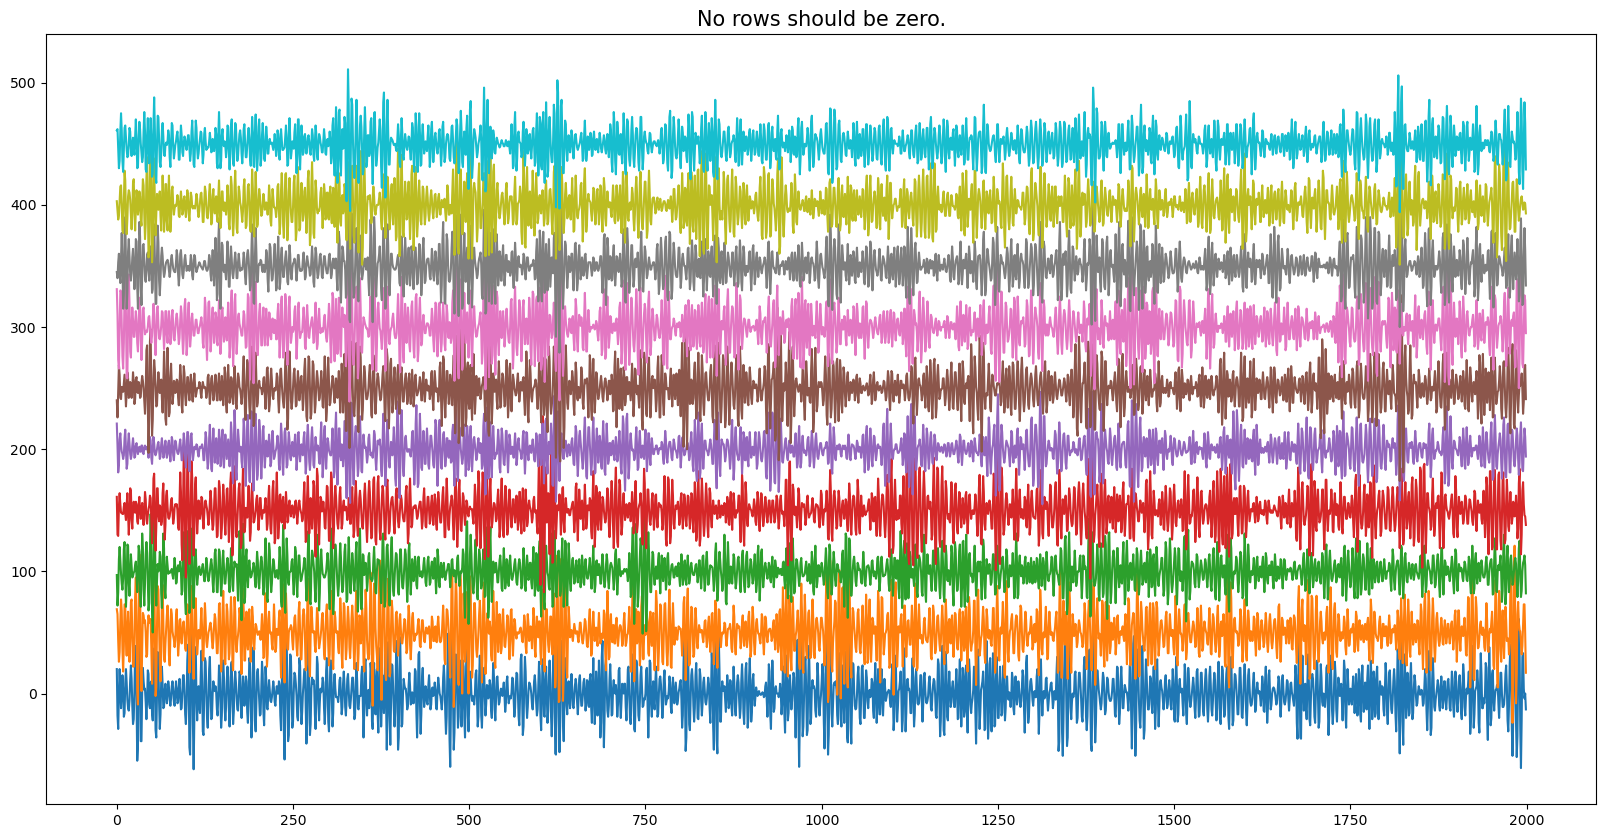

In [110]:
plt.subplots(ncols=1,nrows=1,figsize=(20,10))
r_ind = 0
for i in CA1TetrodeInd:
    
    plt.plot(filtered_lfps[1126234:1128234,i]+r_ind*50);
    #plt.plot(filtered_lfps[60000:61000,i]+r_ind*50);
    r_ind += 1;
plt.title('No rows should be zero.',size = 15);

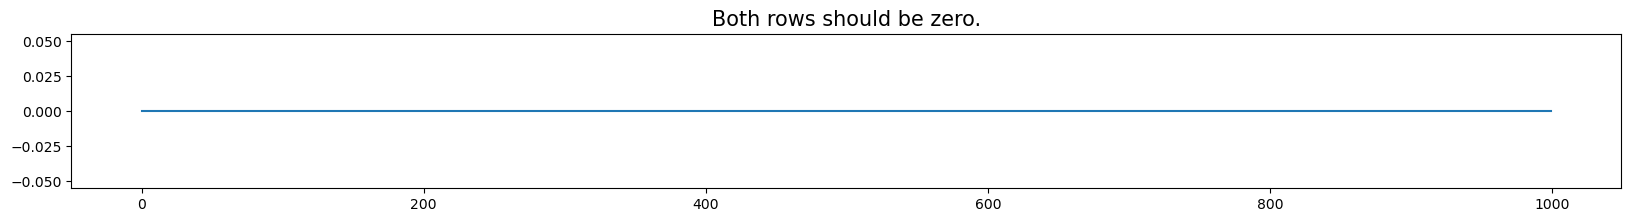

In [107]:
plt.subplots(ncols=1,nrows=1,figsize=(20,2))
r_ind = 0
for i in CCTetrodeInd:
    plt.plot(filtered_lfps[60000:61000,i]+r_ind*10);
    r_ind += 1;
plt.title('Both rows should be zero.',size = 15);

### 2. Find some artifact time

In [ ]:
# This line takes a long time, 10 min
neural_data,neural_ts,mua_time,mua,channel_IDs = load_maze_spike(nwb_copy_file_name,
                                                                 target_interval)

In [100]:
print(f"The range of neural data is: from {neural_ts[0][0]} to {neural_ts[0][-1]}")

The range of neural data is: from 1685899421.4324493 to 1685901289.397437


In [42]:
SMALLEST = np.iinfo(filtered_lfps.dtype).min + 1
drop_ind = np.unique(np.argwhere(filtered_lfps <= SMALLEST)[:,0])

In [104]:
artifact_ind = int(len(drop_ind)/2)+5

delta = int(1000*0.5)
[t0, t1] = [filtered_lfps_t[drop_ind[artifact_ind] - delta],
            filtered_lfps_t[drop_ind[artifact_ind] + delta]]
print([t0,t1])

[1685900516.9665616, 1685900517.9665616]


In [108]:
tind0_lfp

1128234

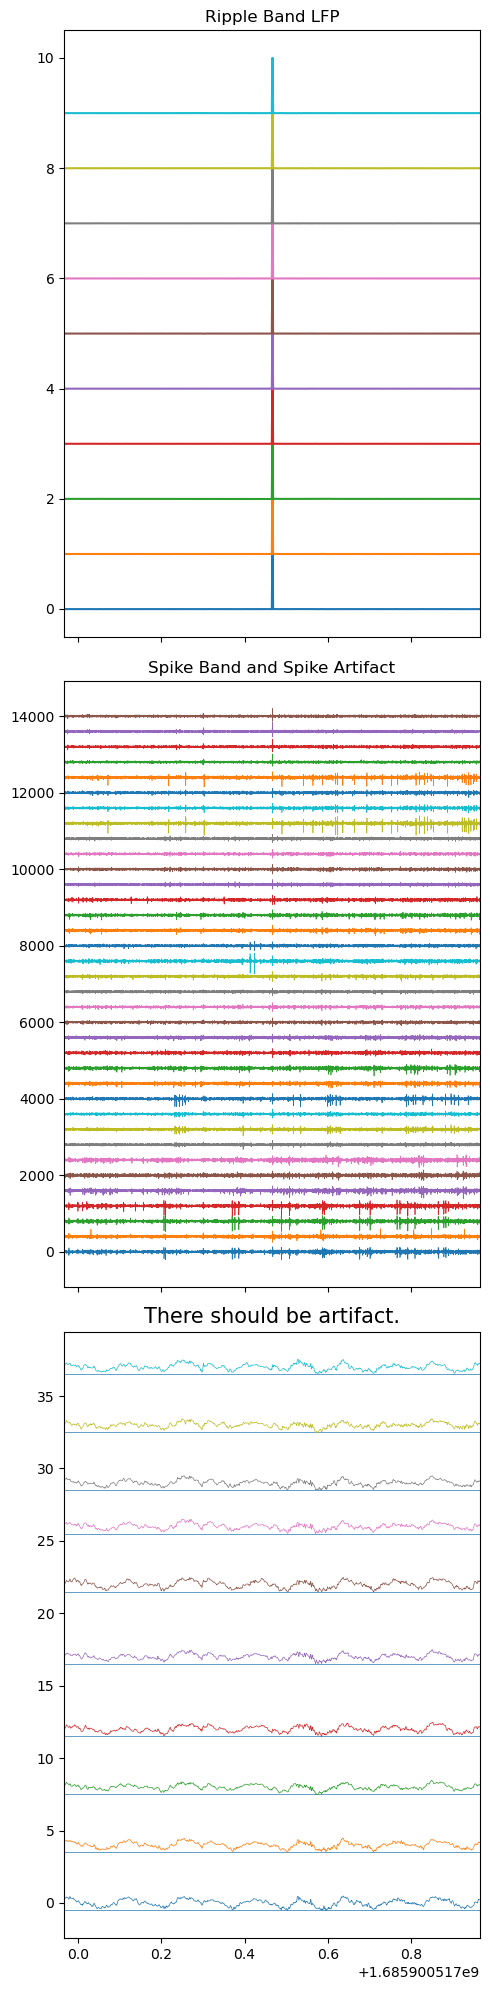

In [112]:
# ripple band
[tind0_lfp, tind1_lfp] = [np.argwhere(filtered_lfps_t >= t0).ravel()[0],
                        np.argwhere(filtered_lfps_t <= t1).ravel()[-1]]
# spike band
[tind0_spike, tind1_spike] = [np.argwhere(neural_ts[0] >= t0).ravel()[0],
                        np.argwhere(neural_ts[0] <= t1).ravel()[-1]]
# broad band
[tind0_broadlfp, tind1_broadlfp] = [np.argwhere(lfp_t >= t0).ravel()[0],
                        np.argwhere(lfp_t <= t1).ravel()[-1]]

fig, axes = plt.subplots(ncols=1,nrows=3,figsize=(5,20),sharex = True)


r_ind = 0
for i in CA1TetrodeInd:
    t_axis = filtered_lfps_t[tind0_lfp: tind1_lfp]
    data = filtered_lfps[tind0_lfp : tind1_lfp, i]
    data = (data - data.mean()) / (data.max() - data.min())
    axes[0].plot(t_axis, data + r_ind*1);
    r_ind += 1;
axes[0].set_title("Ripple Band LFP")


r_ind = 0
for i in range(0,len(channel_IDs),1):
    t_axis = neural_ts[0][tind0_spike : tind1_spike]
    data = neural_data[tind0_spike : tind1_spike, i]
    axes[1].plot(t_axis, data + r_ind*400, linewidth = 0.5);
    r_ind += 1;
axes[1].plot([t0 + delta, t0 + delta],[0,r_ind])


axes[1].set_xlim(t_axis[0],t_axis[-1])

axes[1].set_title("Spike Band and Spike Artifact")

r_ind = 0
for i in CA1TetrodeInd:
    t_axis = lfp_t[tind0_broadlfp : tind1_broadlfp]
    data = lfp[tind0_broadlfp : tind1_broadlfp,i]
    data = (data - data.mean()) / (data.max() - data.min())
    axes[2].axhline(i - 0.5, linewidth = 0.5)
    axes[2].plot(t_axis, data + i, linewidth = 0.5);
    r_ind += 1;
#axes[2].plot([t0 + delta, t0 + delta],[0,r_ind],linewidth = 0.5, alpha = 0.5)

axes[2].set_xlim(t_axis[0],t_axis[-1])

axes[2].set_title("Broad Band LFP and Artifact")

plt.title('There should be artifact.',size = 15);
plt.tight_layout()

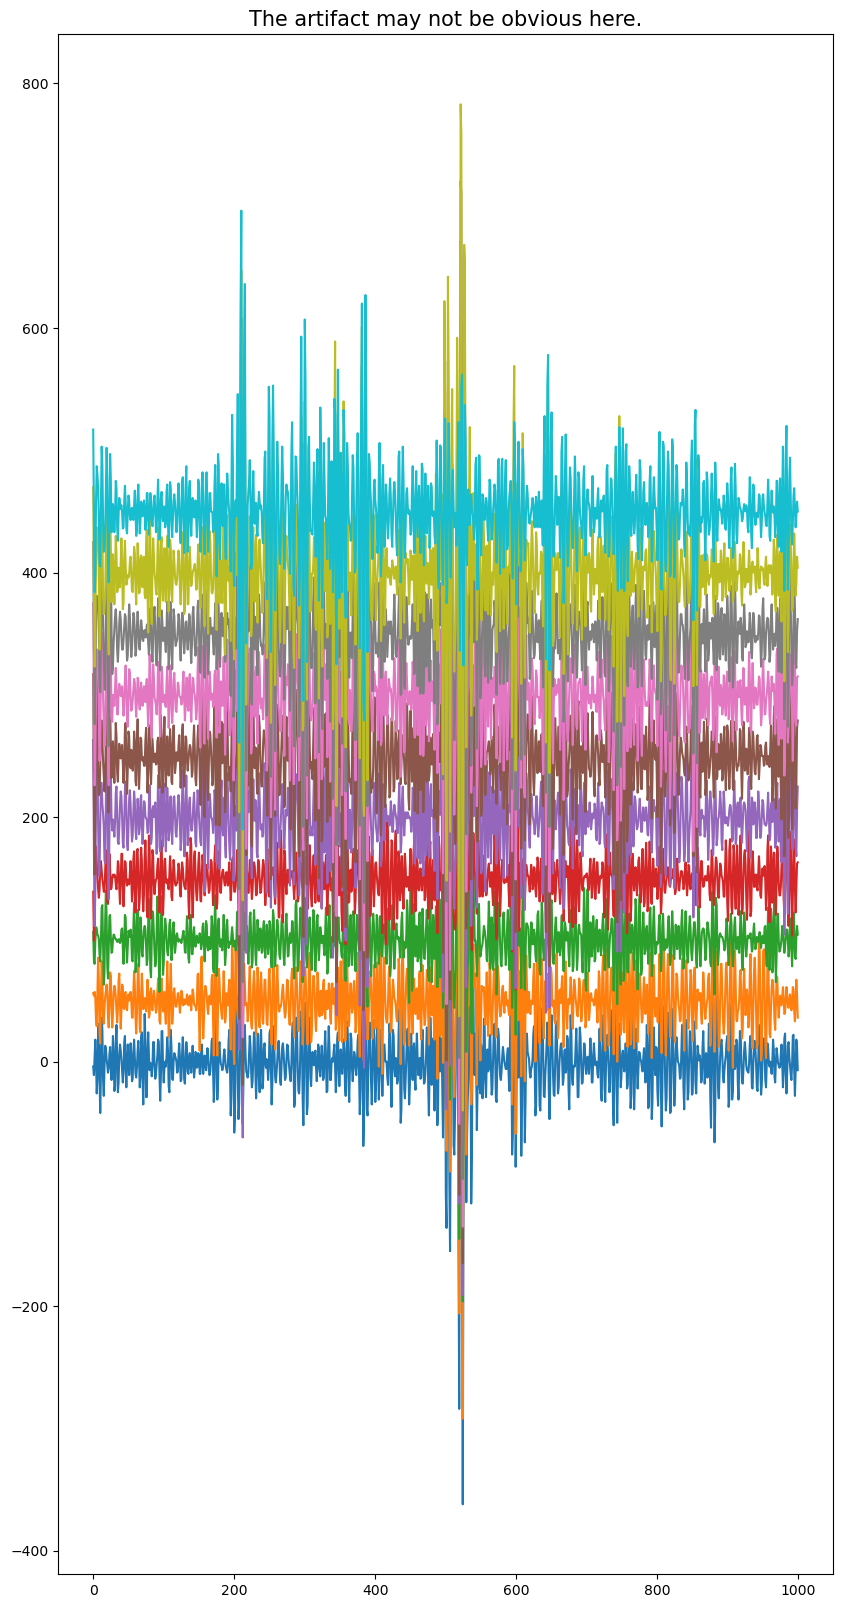

In [57]:
plt.subplots(ncols=1,nrows=1,figsize=(10,20))
r_ind = 0
for i in CA1TetrodeInd:
    plt.plot(filtered_lfps_raw[drop_ind[artifact_ind] - 500 : drop_ind[artifact_ind
             ] + 500,i]+r_ind*50);
    r_ind += 1;
plt.title('The artifact may not be obvious here.',size = 15);

## END HERE